In [37]:
# Import the necessary packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [38]:
# import the iris dataset from seaborn
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [39]:
# check unique species
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [40]:
# drop rows with class label 'setosa'
# iris = iris[iris['species'] != 'versicolor']

In [41]:
# split the data into features and target
X = iris.drop('species', axis=1)
y = iris['species']

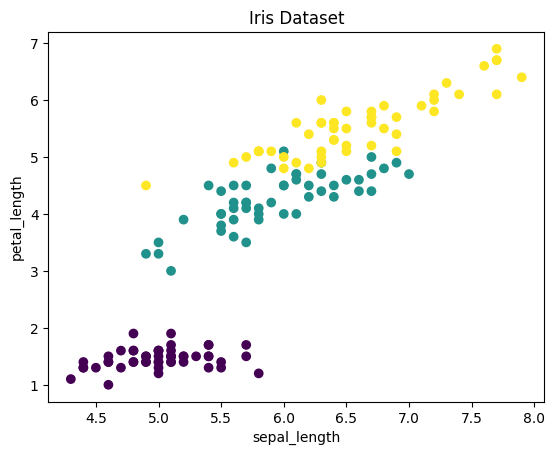

In [42]:
y_map = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
y_changed = y.map(y_map)

# Plot the dataset
plt.scatter(X['sepal_length'], X['petal_length'], c=y_changed, cmap='viridis')
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.title('Iris Dataset')
plt.show()

In [43]:
# Create a logistic regression model
log_reg = LogisticRegression()

# Fit the model to the data
log_reg.fit(X, y)

# Print the coefficients
print('Intercept:', log_reg.intercept_)
print('Coefficients:', log_reg.coef_)

Intercept: [  9.83953571   2.2152668  -12.0548025 ]
Coefficients: [[-0.41833373  0.96660982 -2.52131396 -1.08406594]
 [ 0.53110464 -0.31455442 -0.19947985 -0.94906611]
 [-0.1127709  -0.6520554   2.72079381  2.03313205]]


C:\Users\bethe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
# model accuracy
print('Model Accuracy:', log_reg.score(X, y))

Model Accuracy: 0.9733333333333334


## Classication report and Confusion matrix

In [45]:
# import libraries
from sklearn.metrics import classification_report, confusion_matrix

# print the classification report
y_pred = log_reg.predict(X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.98      0.94      0.96        50
   virginica       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



- *Precision*: Precision is the ratio of correctly predicted positive observations to the total predicted positives. The question that this metric answer is of all flowers that are labeled setosa, how many actually are setosa?
- *Recall*: Recall is the ratio of correctly predicted positive observations to the all observations in actual class. The question recall answers is: Of all the flowers that are truly setosa, how many did we label?
- *F1 Score*: The F1 score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. It is a good way to show that a classifer has a good value for both recall and precision.

Table represantation of confusion matrix

|  |  |  |
| --- | --- | --- |
| True Positive (TP) | False Positive (FP) | Pregnant |
| False Negative (FN) | True Negative (TN) | Not Pregnant |

- TP - True Positive. Means you are pregnant and the model predicted you are pregnant.
- FP - False Positive. Means you are not pregnant and the model predicted you are pregnant.
- FN - False Negative. Means you are pregnant and the model predicted you are not pregnant.
- TN - True Negative. Means you are not pregnant and the model predicted you are not pregnant.

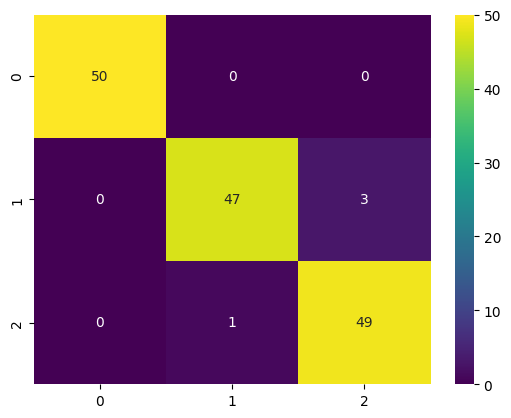

In [46]:
sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap='viridis', fmt='d');

- Precision = TP/(TP+FP)
- recall = TP/(TP+FN)
- F1 Score = 2*(Recall * Precision) / (Recall + Precision)

In [47]:
# virginica
print('Precision score:', 49/(49+3))
print('Recall score:', 49/(49+1))
print('F1 score:', 2*(0.94*0.98)/(0.94+0.98))

Precision score: 0.9423076923076923
Recall score: 0.98
F1 score: 0.9595833333333332


In [48]:
from sklearn.metrics import roc_auc_score

# map the target variable to binary
y = y.map({'setosa': 0, 'versicolor': 1, 'virginica': 1})
# make y_pred binary
import pandas as pd
y_pred = pd.Series(y_pred).map({'setosa': 0, 'versicolor': 1, 'virginica': 2})
y_pred = np.array(y_pred)
roc_auc_score(y, y_pred)

1.0

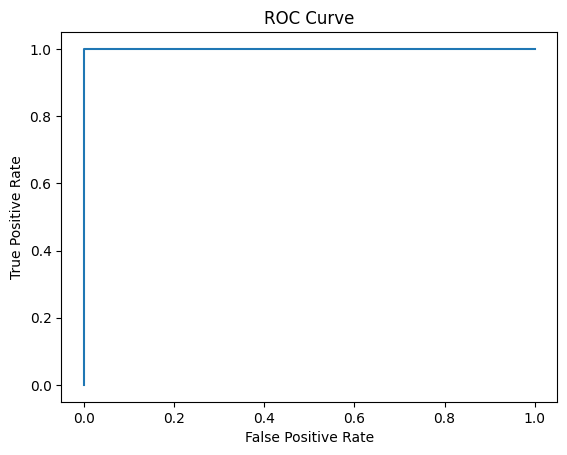

In [49]:
# plot the roc curve 
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()